## План работы
[1. Откроем файл с данными и изучим общую информацию](#1)<br>
[2. Предобработка и подготовка данных](#2)<br>
[3. Проведем исследовательский анализ данныхи](#3)<br>
[4. Составим портрет пользователя каждого региона](#4)<br>
[5. Проверим гипотезы](#5)<br>
[6. Общий вывод](#6)<br>

# 1. Откроем файл с данными и изучим общую информацию <a id = "1"> </a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
%matplotlib inline

# считываем датасет, используемый для анализа
games = pd.read_csv('E:\Документы прочие\IT\Яндекс практикум\Project\Сборный проект 1 Игры\games.csv', index_col=[0])

def data_info(data):
    '''
    Функция принимает в качестве аргемента датасет.
    Функция выводит информацию о датасете и первые 5 строк датасета.
    '''
    data.info()
    display(data.head(10))
    
def data_dublicates(data):
    '''
    Аргумент функции: датасет.
    Функция проверяет количество дубликатов в датасете.
    '''
    print('Количество найденных дубликатов:',data.duplicated().sum())
    

def histogram(data_hist, n_bins, k):
    '''
    Аргументы функции:колонка датасета, число корзин, гистрограмма плотности (True, False).
    Функция строит гистрограмму по колонке датасета.
    '''
    plt.figure(figsize=(15, 10))
    sns.distplot(data_hist, bins=n_bins, kde=k)
    
def data_pivot(data, i, v, f):
    '''
    Аргументы функции:датасет, индекс, значения, функция.
    Функция строит пивот по датасету согласно параметрам.
    '''
    return (data
                .pivot_table(index = i, 
                            values = v, 
                            aggfunc = f)
                .sort_values(by = v, ascending = False)
                .reset_index())

Для анализа мы будем использовать датасет: games.

In [2]:
data_info(games)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Описание данных датасета games:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Колонка Year_of_Release содержит неправильный тип данных, а также год указан с точкой и нулем на конце. В колонках Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating содержатся пропуски.

### Вывод

Была изучена общая информация о полученных данных. Таблица games размером в 16715 строк состоит из 11 колонок и содержит данные 2-х типов: float64, object. В данных содержаться явные ошибки, пропуски данных и у некоторых данных тип не соответствует правильному. Вероятно пропуски связаны с тем, что данные получены из разных источников, в которых собирался различающийся набор информации. Также вероятно, что пропуски связаны с тем, что не всегда собирались агрегированные оценки критиков, пользователей и выставлялись рейтинги. Выполним обработку недочетов на этапе предобработки данных.

# Шаг 2. Предобработка и подготовка данных <a id = "2"> </a>

Приведем к нижнему регистру названия столбцов.

In [3]:
games.columns = map(str.lower, games.columns)

Проанализируем данные таблицы games.

In [4]:
#посчитаем количество пропусков в каждой колонке
display(games.isnull().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Колонки Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating содержат пропуски.

In [5]:
display(games.describe())

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


В колонках с числовыми показателями не содержатся отрицательные значения, что верно исходя из описания данных. Колонки na_sales, eu_sales, other_sales содержат нулевые значения. Проанализируем и обработам каждую колонку отдельно.

#### 1) Колонка name содержит названия игр. Приведем ее к нижнему регистру, чтобы избежать проблем с дубликатами.

In [6]:
games['name'] = games['name'].str.lower()

Колонка содержит 2 пропуска. Проанализируем их.

In [7]:
display(games.query('name != name'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Причиной возникновения пропусков может быть ошибка при экспорте данных. Пропуски колонки name и genre совпадают. Восстановить данные из уже имеющихся не получится. Очистим датасет от этих пропусков.

In [8]:
games.dropna(subset=['name'], inplace= True)

Проанализируем значения в колонке.

In [9]:
display(games['name'].value_counts())

need for speed: most wanted    12
lego marvel super heroes        9
madden nfl 07                   9
fifa 14                         9
ratatouille                     9
                               ..
mega man battle network         1
football manager 2015           1
berzerk                         1
adventure                       1
danball senki                   1
Name: name, Length: 11559, dtype: int64

В колонке содержится 11559 уникальных значений.

In [10]:
display(games.query('name == "need for speed: most wanted"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,need for speed: most wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,need for speed: most wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,need for speed: most wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,need for speed: most wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,need for speed: most wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,need for speed: most wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,need for speed: most wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,need for speed: most wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,need for speed: most wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,need for speed: most wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Некоторые названия игр встречаются несколько раз, по причине того, что они выходили на разных платформах, а также продавались в разные годы.

#### 2) Колонка platform содержит навзания платформ, на которых выходили игры. Приведем ее к нижнему регистру, чтобы избежать проблем с дубликатами.

In [11]:
games['platform'] = games['platform'].str.lower()

Колонка не содержит пропусков, проанализируем ее значения.

In [12]:
display(games['platform'].value_counts())

ps2     2161
ds      2151
ps3     1331
wii     1320
x360    1262
psp     1209
ps      1197
pc       974
xb       824
gba      822
gc       556
3ds      520
psv      430
ps4      392
n64      319
xone     247
snes     239
sat      173
wiiu     147
2600     133
gb        98
nes       98
dc        52
gen       27
ng        12
ws         6
scd        6
3do        3
tg16       2
pcfx       1
gg         1
Name: platform, dtype: int64

Колонка разбивает данные на категории по платформам.

#### 3) Колонка year_of_release содержит годы выпуска игр. Проанализируем значения.

In [13]:
display(games['year_of_release'].value_counts())

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

Колонка разбивает датасет по годам. Обработаем пустые значения.

In [14]:
display(games.query('year_of_release != year_of_release'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,ps2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,ps2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,ps2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,psp,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,freaky flyers,gc,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,inversion,pc,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,hakuouki: shinsengumi kitan,ps3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Колонка содержит 269 пустых значений. Причиной возникновения пустых значений может быть ошибка при экспорте данных. Для того чтобы заполнить пустые значения мы можем воспользоваться данными по выходу игры для другой платформы и вставить данные оттуда. Таким образом заполнятся значения у которых есть пара со значением не NaN.

In [15]:
games_name_group = games.groupby('name')
games['year_of_release'] = games_name_group.year_of_release.apply(lambda x: x.fillna(x.max()))

In [16]:
display(games.query('year_of_release != year_of_release'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe smackdown vs. raw 2006,ps2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,rock band,x360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,frogger's adventures: temple of the frog,gba,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,rock band,wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,rock band,ps3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,homeworld remastered collection,pc,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,shorts,ds,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,agarest senki: re-appearance,ps3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,hakuouki: shinsengumi kitan,ps3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Остались не определены 146 дат. Заполнить средними значениями или медианой будет не верно, так как это исказит данные. Очистим пропуски.

In [17]:
games = games.dropna(subset = ['year_of_release']).reset_index(drop=True)

#### 4)  Колонка genre содержит жанры игр. Приведем ее к нижнему регистру, чтобы избежать проблем с дубликатами и проанализируем значения.

In [18]:
games['genre'] = games['genre'].str.lower()
display(games['genre'].value_counts())

action          3342
sports          2333
misc            1735
role-playing    1484
shooter         1311
adventure       1294
racing          1236
platform         879
simulation       860
fighting         842
strategy         678
puzzle           573
Name: genre, dtype: int64

Колонка разбивает игры на жанры. Она содержит 12 видов жанров игр и не содержит пропуски.

#### 5)  Колонка na_sales содержит данные по продаже игр в Северной Америке, указанные в миллионах долларов. Проанализируем значения.

In [19]:
display(games['na_sales'].value_counts())

0.00    4468
0.02     566
0.03     557
0.04     545
0.05     540
        ... 
4.98       1
4.21       1
6.82       1
5.05       1
9.00       1
Name: na_sales, Length: 402, dtype: int64

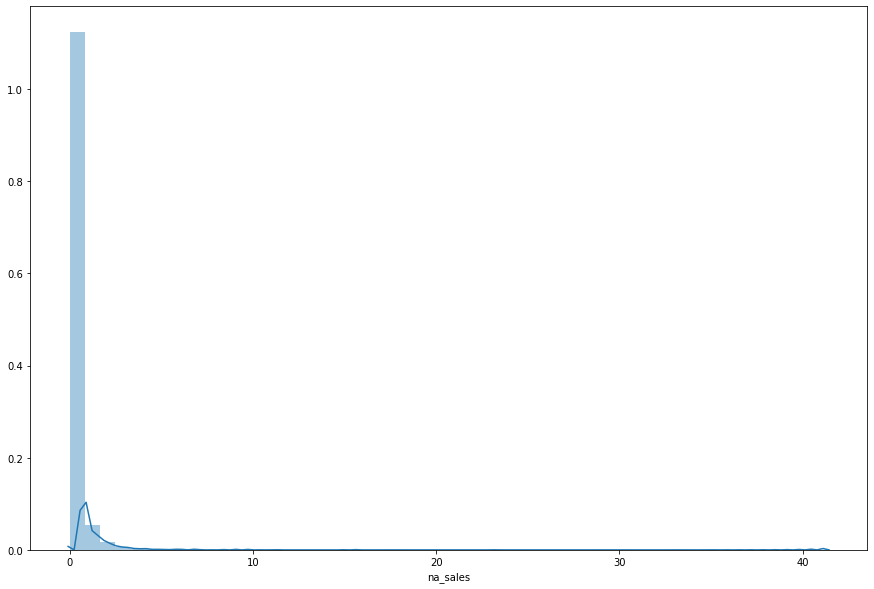

In [20]:
histogram(games['na_sales'], 50, True)

Колонка не содержит пропусков, но содержит большое число значений с 0. Возможной причиной может быть либо отсутствие продаж в этих регионах, либо экспортируемые данные были округлены и при эскопрте была потеряна тысячная доля. Аналогичная ситуация наблюдается с колонками eu_sales, jp_sales, other_sales. Заполнять нулевые значения нельзя, так как это может сильно исказить имеющиеся данные. В bug report следует указать это, и в дальнейшем уточнить то, как собирались данные и как обрабатывались.

#### 6) Колонка eu_sales содержит данные по продаже игр в Европе, указанные в миллионах долларов. Проанализируем значения.

In [21]:
display(games['eu_sales'].value_counts())

0.00    5800
0.01    1479
0.02    1299
0.03     919
0.04     706
        ... 
3.59       1
4.02       1
2.24       1
2.27       1
3.75       1
Name: eu_sales, Length: 307, dtype: int64

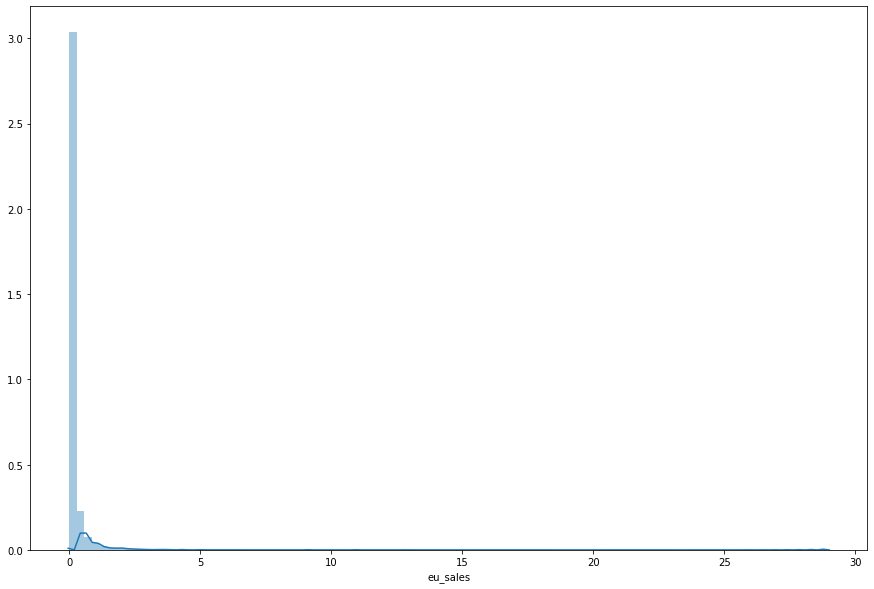

In [22]:
histogram(games['eu_sales'], 100, True)

Колонка не содержит пропусков, но также содержит большое число значений с 0. Оставим эти значения не тронутыми, так как их изменение может сильно исказить аналитику.

#### 7) Колонка jp_sales содержит данные по продаже игр в Японии, указанные в миллионах долларов. Проанализируем значения. 

In [23]:
display(games['jp_sales'].value_counts())

0.00    10407
0.02      734
0.01      704
0.03      541
0.04      392
        ...  
1.16        1
2.12        1
7.20        1
2.17        1
6.50        1
Name: jp_sales, Length: 244, dtype: int64

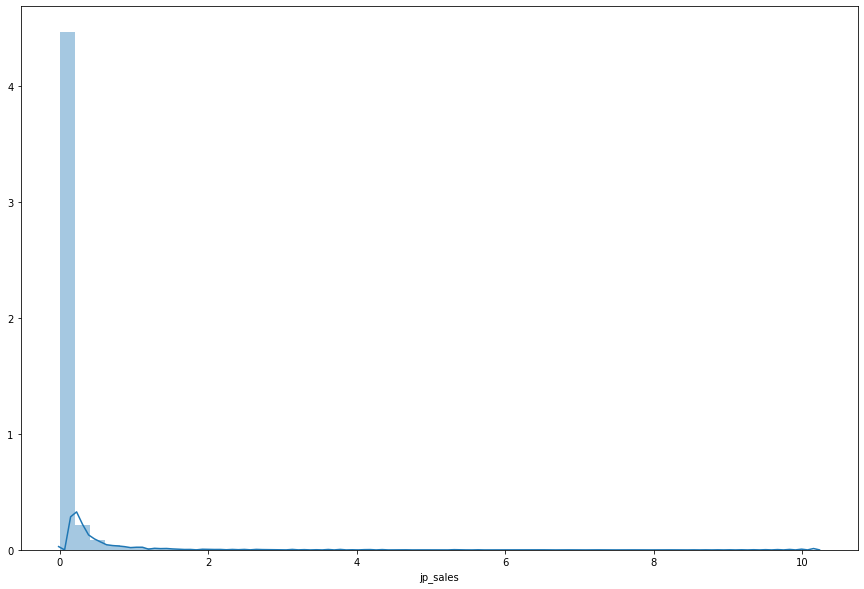

In [24]:
histogram(games['jp_sales'], 50, True)

Колонка не содержит пропусков, но содержит большое число значений с 0. Оставим эти значения не тронутыми, так как их изменение может сильно исказить аналитику.

#### 8) Колонка other_sales содержит данные по продаже игр в других странах, указанные в миллионах долларов. Проанализируем значения.

In [25]:
display(games['other_sales'].value_counts())

0.00    6527
0.01    3427
0.02    1612
0.03     920
0.04     649
        ... 
0.96       1
1.93       1
0.97       1
1.37       1
1.06       1
Name: other_sales, Length: 155, dtype: int64

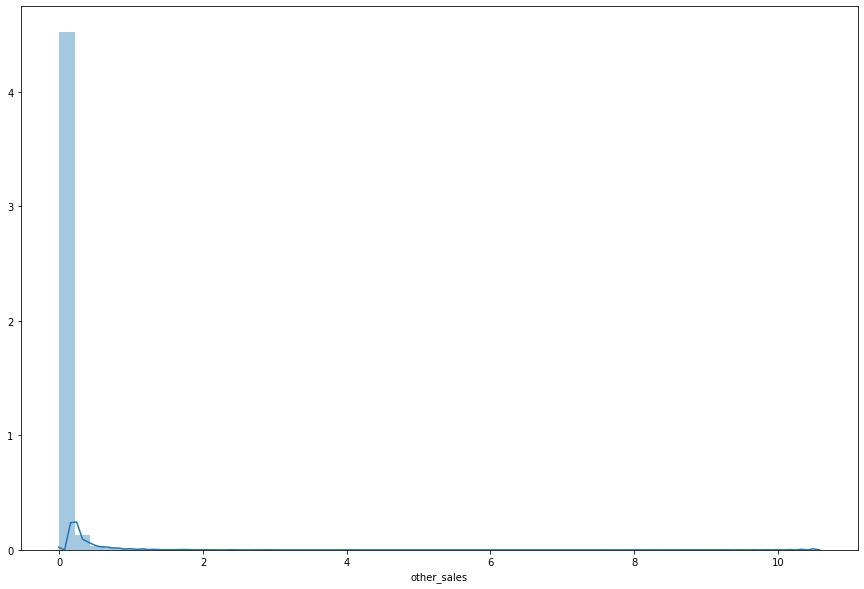

In [26]:
histogram(games['other_sales'], 50, True)

Колонка не содержит пропусков, но также содержит большое число значений с 0. Оставим эти значения не тронутыми, так как их изменение может сильно исказить аналитику.

#### 9) Колонка critic_score содержит оценки игр критиками (максимальное значение 100). Проанализируем значения.

In [27]:
display(games['critic_score'].value_counts())

70.0    253
71.0    252
75.0    243
78.0    238
80.0    236
73.0    236
76.0    233
74.0    226
72.0    224
77.0    223
68.0    218
79.0    218
81.0    217
69.0    212
82.0    206
83.0    205
66.0    203
65.0    192
84.0    183
67.0    182
63.0    178
64.0    169
62.0    169
61.0    165
59.0    157
60.0    153
85.0    150
58.0    149
86.0    134
57.0    131
87.0    118
88.0    116
56.0    110
55.0    109
89.0    104
53.0    101
54.0     98
51.0     89
49.0     85
50.0     79
90.0     76
52.0     73
91.0     69
48.0     65
47.0     65
46.0     55
43.0     54
92.0     52
44.0     49
45.0     47
93.0     47
39.0     39
94.0     37
42.0     37
38.0     34
41.0     29
37.0     28
35.0     27
36.0     26
40.0     26
33.0     21
96.0     18
95.0     16
32.0     15
26.0     12
30.0     12
97.0     11
28.0     11
34.0      9
31.0      9
27.0      8
25.0      7
19.0      6
23.0      4
24.0      4
98.0      4
20.0      3
29.0      3
13.0      1
17.0      1
21.0      1
Name: critic_score, dtype: i

In [28]:
print('Пропусков в колонке critic_score:', games['critic_score'].isnull().sum())

Пропусков в колонке critic_score: 8492


Оценки критиков лежат в промежутке от 0 до 100, что верно исходя из описания данных. При этом колонка содержит 8576 пропусков. Причиной возникновения пропусков может быть ошибка при экспорте данных, отсутствие статистических данных по оценкам критиков в ранние годы (когда не было интернета и сайтов агрегаторов оценок по типу metacritic), а также просто отсутствие оценок критиков (например игра не была популярна и критики проигнорировали ее).

In [29]:
display(games.query('critic_score != critic_score'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16562,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16563,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16564,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16565,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Аналогично дату выхода игры мы можем заполнить пропуски в колонке critic_score, если соответствующая игра выходила на нескольких платформах и у нее есть оценки критиков хотябы на одной из них. Заполним пропуски средним по остальным платформам по соответствующей игре, так как зачастую расброс рейтинга игры в зависимости от платформы не вилик.

In [30]:
games['critic_score'] = games_name_group.critic_score.apply(lambda x: x.fillna(x.mean()))

In [31]:
print('Пропусков в колонке critic_score:', games['critic_score'].isnull().sum())

Пропусков в колонке critic_score: 7502


Пропусков в колонке стало меньше, однако удалось заполнить не все пропуски. Заполнить оставшиеся медианой или средним значением будет не верно, так как рейтинг отдельной игры не зависит от рейтингов других игр или рейтинга игр в опреденном жанре или рейтинга игр в определенной году.

#### 10) Колонка user_score содержит оценки игр пользователями (максимальное значение 10). Проанализируем значения.

In [32]:
display(games['user_score'].value_counts())

tbd    2394
7.8     324
8       288
8.2     279
8.3     253
8.5     252
7.5     251
7.9     249
8.1     241
7.7     239
7.3     236
8.4     222
7       219
7.4     215
7.6     214
8.6     209
6.8     195
8.7     187
8.8     182
7.1     180
7.2     166
8.9     151
6.6     148
6.9     140
6.3     136
6.7     128
6       127
6.5     125
9       119
6.2     113
6.4     106
5.8      97
9.1      90
6.1      82
5.7      77
5.9      77
5.6      72
5.4      72
5.3      70
5.5      70
5        64
5.2      57
4.8      49
5.1      44
9.2      43
4.9      40
4.6      37
4.3      37
4.5      33
4.1      33
4.4      33
9.3      31
4        27
4.2      27
3.8      27
3.5      26
2.8      24
4.7      24
3.1      23
3.4      23
3        21
3.7      19
3.6      18
3.3      15
3.9      13
3.2      12
2.5      12
2.4      11
9.4      11
2        11
2.1       9
1.7       9
2.9       9
2.7       8
2.2       6
1.8       5
9.5       5
1.4       5
2.6       4
1.2       3
1.6       3
1.5       2
1         2
0.2 

Оценки игроков содержат 2424 tbd значений. Что означает to be determined - оценки определяются в данный момент.

In [33]:
print('Пропусков в колонке user_score:', games['user_score'].isnull().sum())

Пропусков в колонке user_score: 6633


Помимо значений tbd, колонка содержит 6699 пропусков. Причиной возникновения пропусков может быть ошибка при экспорте данных, отсутствие статистических данных по оценкам игроков в ранние годы (когда не было интернета и сайтов агрегаторов оценок по типу metacritic), а также просто отсутствие оценок игроков (например игра не была популярна и плохо продалась).

In [34]:
display(games.query('user_score != user_score'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16562,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16563,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,65.0,NaN,NaN
16564,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16565,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,64.0,NaN,NaN


Также колонка содержит 1 нулевое значение. Очистим датасет от этого значения. Это не повлияет на аналитику в дальнейшем.

In [35]:
games = games.query('user_score != "0"').reset_index(drop = True)

Для того, чтобы заполнить пропуски и tbd нам нужно привести тип данных в колонке user_score к типу float. Для начала преобразуем значения tbd в 0 и преобразуем тип в float.

In [36]:
games['user_score'] = games['user_score'].replace('tbd', '0.0')
games['user_score'] = games['user_score'].astype('float')

In [37]:
display(games['user_score'].value_counts())

0.0    2394
7.8     324
8.0     288
8.2     279
8.3     253
8.5     252
7.5     251
7.9     249
8.1     241
7.7     239
7.3     236
8.4     222
7.0     219
7.4     215
7.6     214
8.6     209
6.8     195
8.7     187
8.8     182
7.1     180
7.2     166
8.9     151
6.6     148
6.9     140
6.3     136
6.7     128
6.0     127
6.5     125
9.0     119
6.2     113
6.4     106
5.8      97
9.1      90
6.1      82
5.7      77
5.9      77
5.6      72
5.4      72
5.5      70
5.3      70
5.0      64
5.2      57
4.8      49
5.1      44
9.2      43
4.9      40
4.3      37
4.6      37
4.4      33
4.5      33
4.1      33
9.3      31
3.8      27
4.0      27
4.2      27
3.5      26
4.7      24
2.8      24
3.4      23
3.1      23
3.0      21
3.7      19
3.6      18
3.3      15
3.9      13
3.2      12
2.5      12
2.0      11
2.4      11
9.4      11
2.1       9
1.7       9
2.9       9
2.7       8
2.2       6
1.4       5
1.8       5
9.5       5
2.6       4
1.2       3
1.6       3
1.0       2
0.5       2
1.5 

Заполним средними значениями пропуски оценок по играм, а также нулевые значения из оценок игроков по другим платформам соответствующей игры, если таковые имеются.

In [38]:
games_name_group = games.groupby('name')
games['user_score'] = games_name_group.user_score.apply(lambda x: x.fillna(x.mean()))
games['user_score'] = games_name_group.user_score.apply(lambda x: x.replace(0, x.mean()))

In [39]:
print('Пропусков в колонке user_score:', games['user_score'].isnull().sum())

Пропусков в колонке user_score: 6204


In [40]:
display(games['user_score'].value_counts())

0.000000    1724
7.800000     337
8.000000     299
8.200000     290
8.300000     264
            ... 
7.150000       1
3.800000       1
7.012500       1
4.433333       1
5.583333       1
Name: user_score, Length: 375, dtype: int64

Удалось заполнить некоторые пропуски и нулевые значения. Оставшиеся пропуски и нулвые значения оставим без изменения.

#### 11) Колонка rating содержит рейтинги игр от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Проанализируем значения.

In [41]:
display(games['rating'].value_counts())

E       3957
T       2930
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

Колонка разбивает игры по возрастному рейтингу. В колонке содержится 8 возрастных категорий. 

In [42]:
print('Пропусков в колонке rating:', games['rating'].isnull().sum())

Пропусков в колонке rating: 6699


Колонка содержит 6764 пропусков. Пропуски могут быть из-за того, что ESRB не выставляла рейтинг для этой платформы или игры, либо из-за ошибки при экспорте данных. ESRB Была основана в 1993 году. Поэтому все игры старше 1993 года не могут иметь данного рейтинга.

In [43]:
display(games.query('(rating != rating)&(year_of_release<1993)'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
18,super mario world,snes,1990.0,platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
21,super mario land,gb,1989.0,platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12620,teenage mutant ninja turtles: tournament fighters,snes,1992.0,fighting,0.00,0.00,0.06,0.00,62.0,NaN,NaN
12953,lagoon,snes,1991.0,role-playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13458,sonic the hedgehog 2 (8-bit),gg,1992.0,platform,0.00,0.00,0.04,0.00,NaN,NaN,NaN
15555,empire deluxe,pc,1992.0,strategy,0.02,0.00,0.00,0.00,NaN,NaN,NaN


Мы нашли 301 игру, для которой не могло быть рейтинга ESRB. Значит остальные пропуски вызваны ошибкой экпорта данных, либо не все данные были собраны на момент анализа.

In [44]:
display(games.query('rating != rating'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16561,samurai warriors: sanada maru,ps3,2016.0,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16562,lma manager 2007,x360,2006.0,sports,0.00,0.01,0.00,0.00,65.0,NaN,NaN
16563,haitaka no psychedelica,psv,2016.0,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16564,spirits & spells,gba,2003.0,platform,0.01,0.00,0.00,0.00,64.0,NaN,NaN


Оставим пропуски без изменений.

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [45]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Проанализируем данные на дубликаты.

In [46]:
data_dublicates(games)

Количество найденных дубликатов: 0


## Вывод

Были проанализированы данные. Колонки были приведены к их соответствующим типам данных, названия колонок, а также колонки с типом object были переведены в нижний регистр. Также были проанализированы пустые значения и заполнены, там, где это было возможно. Данные были проверены на дубликаты.

# Шаг 3. Проведем исследовательский анализ данных <a id = "3"> </a>

#### 1) Посмотрим, сколько игр выпускалось в разные годы.

In [47]:
# таблица по релизу игр по годам
games_year_count = (games
                    .pivot_table(index = 'year_of_release', 
                                 values = 'name', 
                                 aggfunc = 'count').reset_index())

Построим график количества выпущенных игр за все годы существования игровой индустрии.

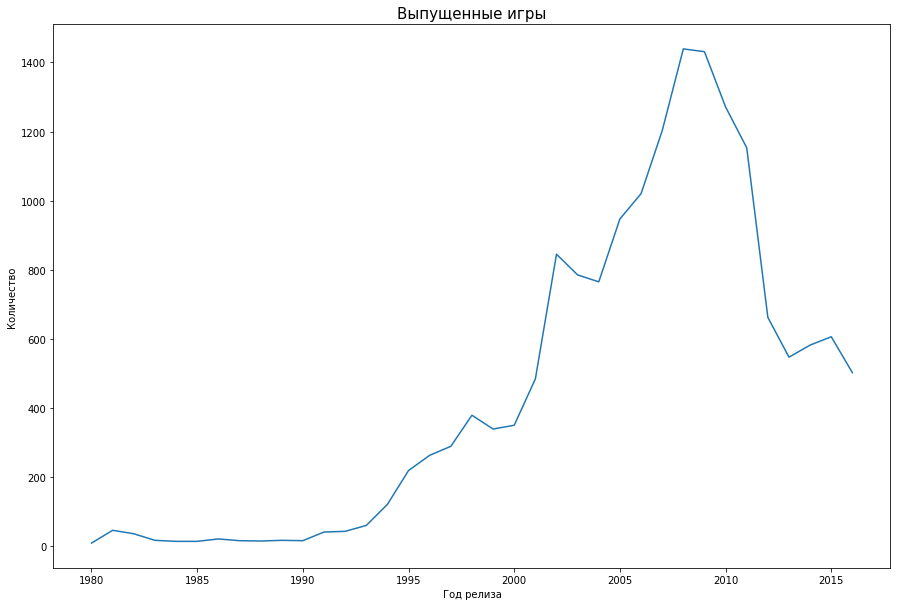

In [48]:
plt.figure(figsize=(15,10))
ax = sns.lineplot(x = 'year_of_release', y = 'name', data = games_year_count, palette = 'dark')
ax.axes.set_title('Выпущенные игры',fontsize=15)
ax.set(xlabel='Год релиза', ylabel='Количество', )
plt.show()

Из графика мы видим, что с 1993 года количество выпускаемых игр стремительно росло и достигнув в 2008 году 1439 игр, начало снижаться и до 2016 года наблюдается тенденция к снижению количества выпускаемых игр ежегодно. Это связано с экономическим кризисом 2008 года, в то время были заморожены многие проекты и много студий было закрыто. Данные за все периоды не так важны, потому что за такой длительный срок произошло большое количество изменений в индустрии, сменилось множество поколений платформ, а также появилось множество новых.

#### 2) Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

Определим платформы с наибольшими суммарными продажами.

In [49]:
# таблица отображающая выручку по платформам
platform_sales = data_pivot(games, 'platform', 'total_sales', 'sum')

# выбираем 5 плафторм с наибольшими суммарными продажами за все годы
platform_sales_top_5 = platform_sales.loc[0:4]['platform']

#строим распределение по годам
platform_top_5_sales = (games
                               .query('platform in @platform_sales_top_5')
                               .reset_index(drop = True))

platform_top_5_sales_pivot = data_pivot(platform_top_5_sales, ['platform', 'year_of_release'], 'total_sales','sum')

Построим график продаж игр по платформам с наибольшей выручкой.

<Figure size 1080x720 with 0 Axes>

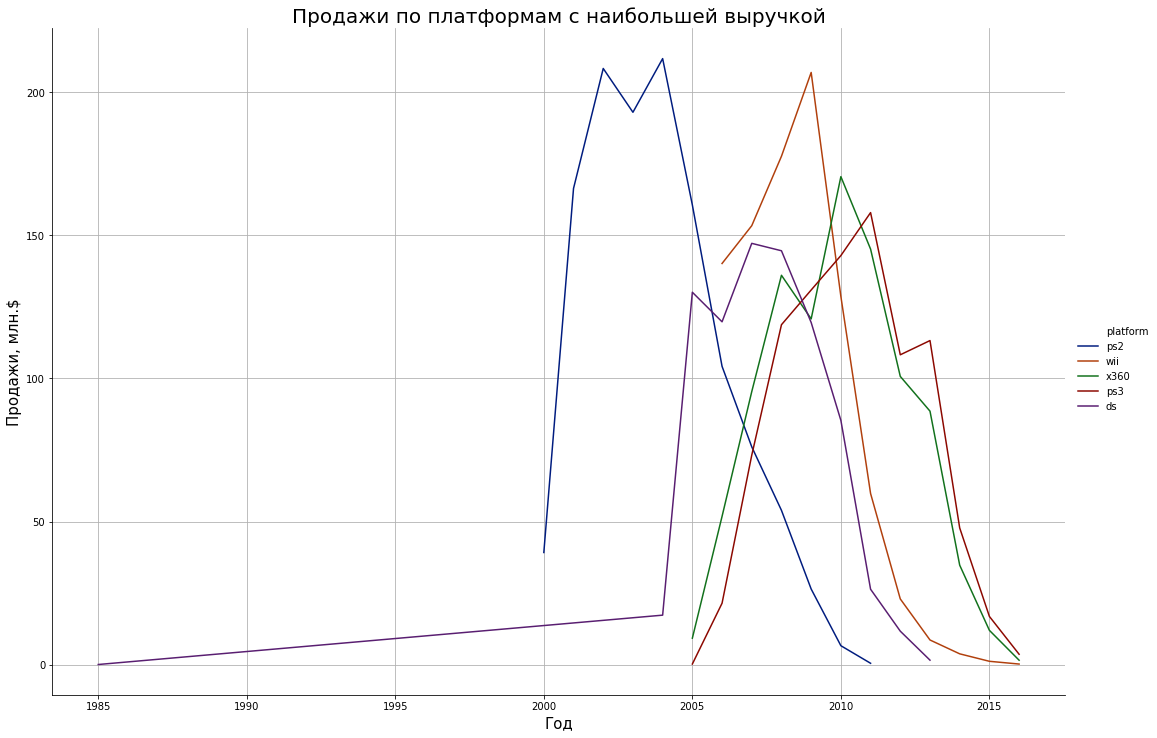

In [50]:
plt.figure(figsize=(15,10))
sns.relplot(x = 'year_of_release', y = 'total_sales', hue = 'platform', 
                 kind = 'line', data = platform_top_5_sales_pivot,
                 height = 10, aspect = 1.5, alpha = 1, palette = 'dark'
                )
plt.title('Продажи по платформам с наибольшей выручкой',fontsize=20)
plt.xlabel('Год', fontsize=15)
plt.ylabel('Продажи, млн.$', fontsize=15)
plt.grid(True)
plt.show()

Из графика мы можем наблюдать, что характерным сроком за который появляются и исчезают платформы является ~ 10 лет. В первые 5 лет мы можем наблюдать рост продаж и снижение продаж в последующие 5 лет. Из графика мы видим, что 5 самых популярных платформ уже завершили или завершают свой жизненный цикл в 2016 году. Наиболее оптимальным решение будет анализ данных за последние 5 лет, то есть с 2012 по 2016, так как нас интересует прогноз на 2017 год. Если мы возьмем последние 10 лет, то мы захватим жизненный цикл платформ прошлого поколения, которые начали снижать свои продажи с 2009-2012 года.

In [51]:
games_final = games.query('year_of_release >= 2012').reset_index(drop = True)

#### 3) Проанализируем какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

In [52]:
# таблица отображающая выручку по платформам
platform_sales = data_pivot(games_final, ['platform', 'year_of_release'], 'total_sales', 'sum')

Построим график продаж игр по платформам за последние 5 лет.

<Figure size 1080x720 with 0 Axes>

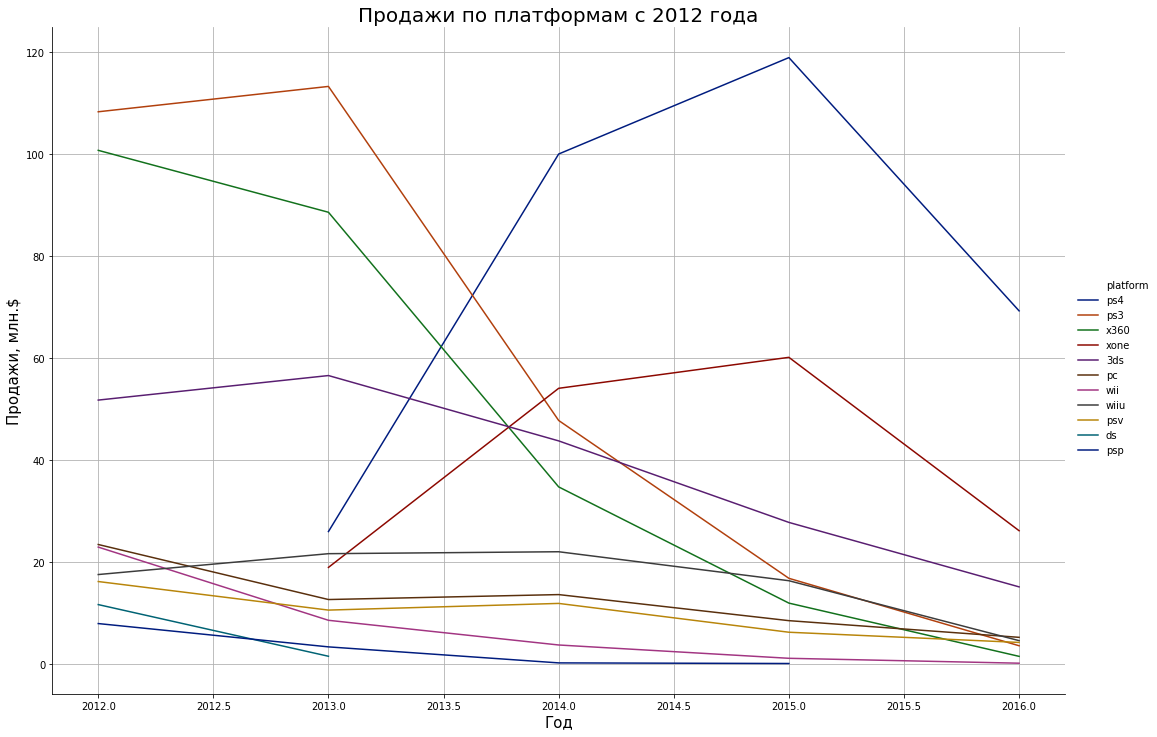

In [53]:
# график продажи игр по платформам за полседние 5 лет
plt.figure(figsize=(15,10))
sns.relplot(x = 'year_of_release', y = 'total_sales', hue = 'platform', 
                 kind = 'line', data = platform_sales,
                 height = 10, aspect = 1.5, alpha = 1, palette = 'dark'
                )
plt.title('Продажи по платформам с 2012 года',fontsize=20)
plt.xlabel('Год', fontsize=15)
plt.ylabel('Продажи, млн.$', fontsize=15)
plt.grid(True)
plt.show()

На графике мы видим, что на таких платформах как x360, ps3, 3ds, wii, psp продажи имеют тенденцию к снижению, что связано с завершение жизненного цикла платформ. Ни одна платформа не показывает усточивого роста на протяжении периода с 2012 по 2016, однако мы видим, что такие платформы как ps4 и xone, жизненный цикл которых начался с 2013 года, являются наиболее перспективными и продажа игр на них приносят наибольшую выручку с 2014 года.

#### 4) Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. 

Возьмем период последние 5 лет.

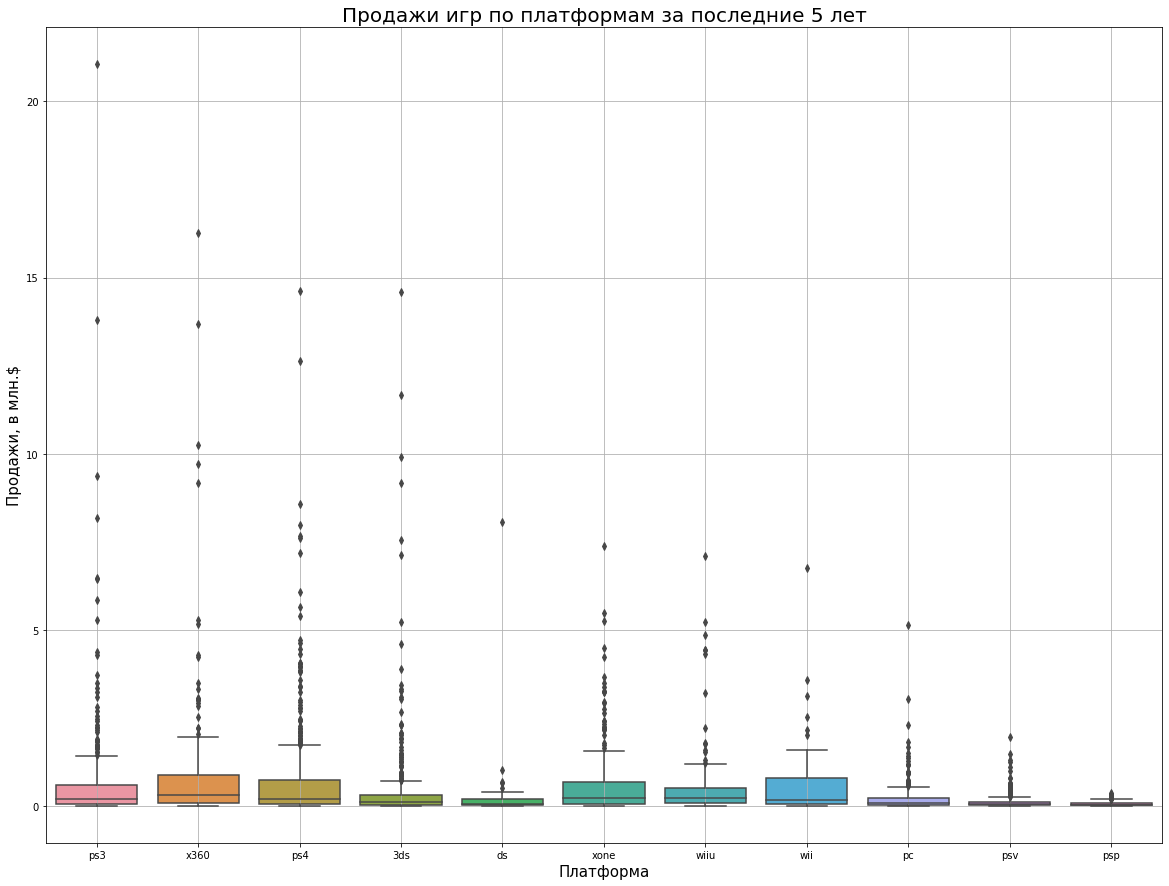

In [54]:
# график глобальных продаж игр по платформам за последние 5 лет
plt.figure(figsize=(20,15))
sns.boxplot(y = 'total_sales', x='platform', data=games_final)
plt.title('Продажи игр по платформам за последние 5 лет',fontsize=20)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Продажи, в млн.$', fontsize=15)
plt.grid(True)
plt.show()

Мы видим, что разница в продажах по платформам не сильно велика. Есть платформы лидеры, у которых суммарный объем продаж больше остальных, такие как: Xbox 360, Xbox One, PS3, PS4, Wii. Однаком мы видим, что у разных платформ присутствуют выбросы. Это игры-хиты, которые продались очень большим тиражом и принесли создателям свердоходы. Проанализируем в качестве пример игру на платформе ps3.

In [55]:
display(games_final.query('(platform == "ps3")&(total_sales == total_sales.max())'))


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,grand theft auto v,ps3,2013.0,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05


Это Grand theft Auto V, одна из самых популярных видеоигр последнего десятилетия.

#### 5) Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Для анализа будем использовать платформу с самыми высокими продажами с 2014 года - PS4.

In [56]:
# отфильруем тип платформы ps4
games_final_ps4 = games_final.query('platform == "ps4"').reset_index(drop = True)

print('Коэффициент корреляции между рейтингом пользователей и продажами на PS4: {:.2f}'
      .format(games_final_ps4['user_score'].corr(games_final_ps4['total_sales'])))

Коэффициент корреляции между рейтингом пользователей и продажами на PS4: 0.04


<Figure size 1440x1080 with 0 Axes>

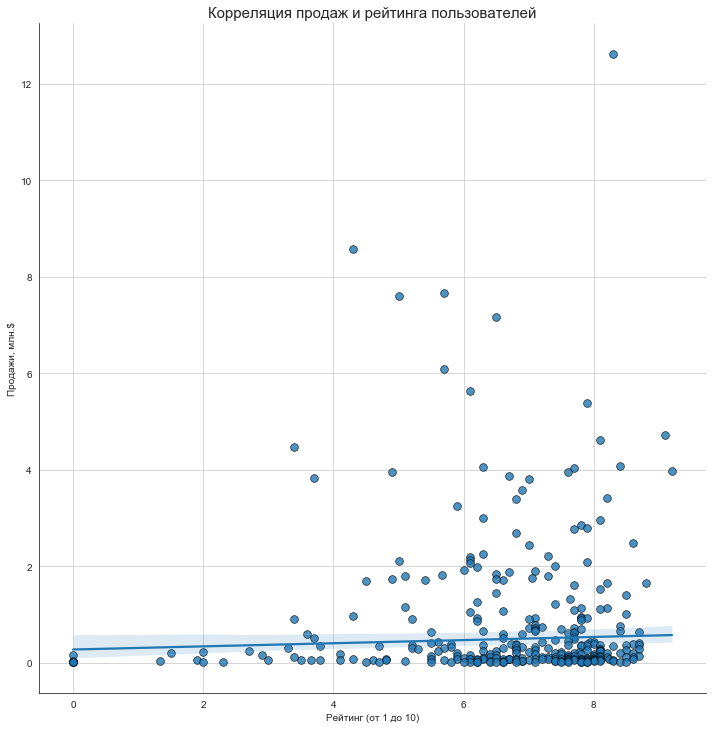

In [57]:
# график корреляции продаж и рейтинга пользователей
plt.figure(figsize=(20,15))
sns.set_style("white")
sns.lmplot(x="user_score", y="total_sales", 
                     data=games_final_ps4, 
                     height=10, 
                     robust=True, 
                     palette='pastel', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.title('Корреляция продаж и рейтинга пользователей',fontsize=15)
plt.xlabel('Рейтинг (от 1 до 10)', fontsize=10)
plt.ylabel('Продажи, млн.$', fontsize=10)
plt.grid(True)
plt.show()

Корреляции между рейтингом пользователей и продажами близка к 0, поэтому можно сделать вывод о том, что изменение рейтингов пользователей не влечет за собой изменение объемов продаж.

In [58]:
print('Коэффициент корреляции между рейтингом критиков и продажами на PS4: {:.2f}'
      .format(games_final_ps4['critic_score'].corr(games_final_ps4['total_sales'])))

Коэффициент корреляции между рейтингом критиков и продажами на PS4: 0.39


<Figure size 1080x720 with 0 Axes>

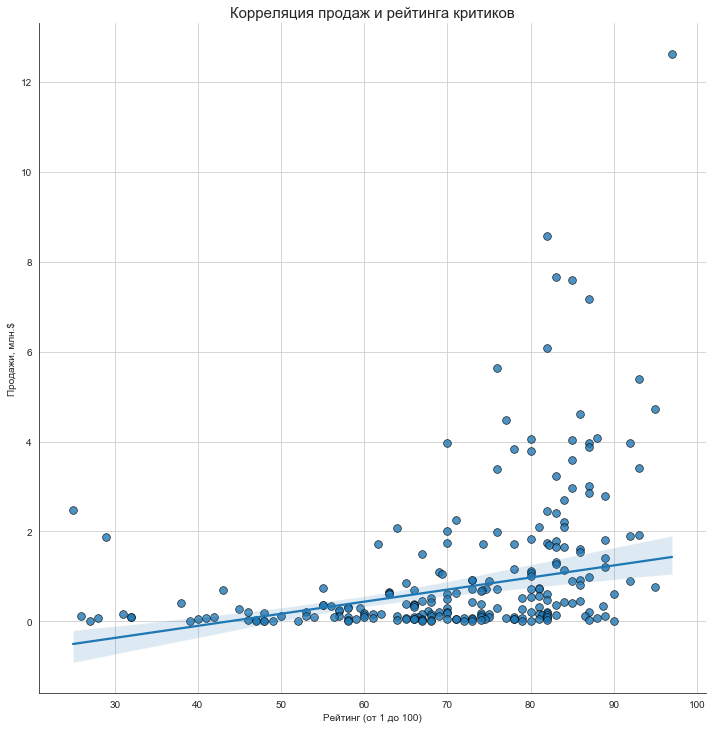

In [59]:
# график корреляции продаж и рейтинга критиков
plt.figure(figsize=(15,10))
sns.set_style("white")
sns.lmplot(x="critic_score", y="total_sales", 
                     data=games_final_ps4, 
                     height=10, 
                     robust=True, 
                     palette='pastel', 
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.title('Корреляция продаж и рейтинга критиков',fontsize=15)
plt.xlabel('Рейтинг (от 1 до 100)', fontsize=10)
plt.ylabel('Продажи, млн.$', fontsize=10)
plt.grid(True)
plt.show()

Корреляции между рейтингом критиков и продажами положительная и составила 0.39, поэтому можно сделать вывод о том, что чем выше рейтинг критиков , тем выше объем продаж и наоборот. Люди больше доверяют критикам, чем простым игрокам и хорошая критика действует на покупателя как дополнительная реклама.

In [60]:
print('Коэффициент корреляции между рейтингом критиков и продажами за последние 5 лет: {:.2f}'
      .format(games_final['critic_score'].corr(games_final['total_sales'])))

Коэффициент корреляции между рейтингом критиков и продажами за последние 5 лет: 0.32


Мы видим, что корреляция данных показателей для всех остальных платформ слабо отличается от корреляции для ps4. Таким образом, можно сделать вывод о среднем влиянии критиков на продажи игр. Чем выше оценки, тем успешнее будет игра, независимо от платформы и наоборот.

#### 6) Посмотрим на общее распределение игр по жанрам. 

In [61]:
# построим сводную таблицу по продажам игр в зависимости от жанра за послдение 5 лет
genre_pivot = (games_final
                            .pivot_table(index = ['genre'], 
                            values = 'total_sales', 
                            aggfunc = 'sum')
                  .sort_values(by = 'total_sales', ascending = False)
                  .reset_index())

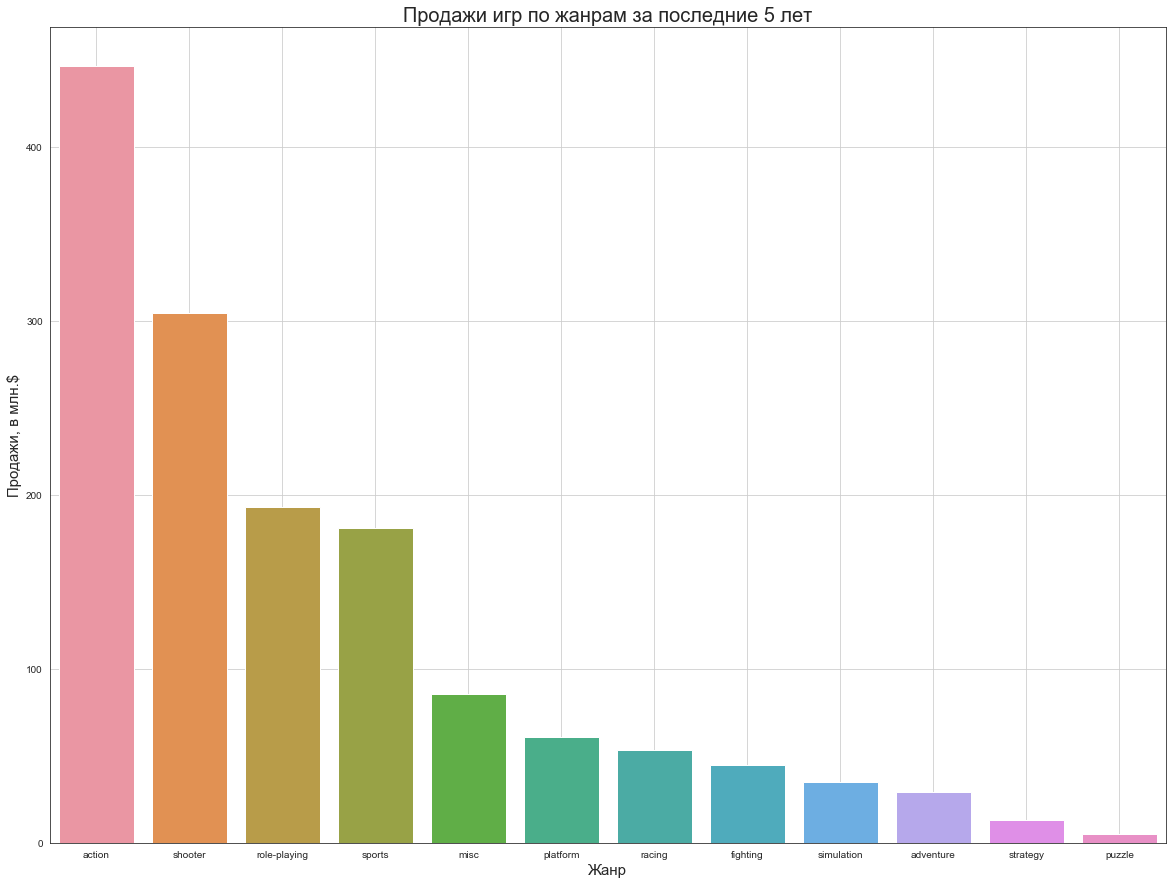

In [62]:
# график продаж игр по жанрам за последние 5 лет
plt.figure(figsize=(20,15))
sns.barplot(x="genre", y="total_sales", data=genre_pivot)
plt.title('Продажи игр по жанрам за последние 5 лет',fontsize=20)
plt.xlabel('Жанр', fontsize=15)
plt.ylabel('Продажи, в млн.$', fontsize=15)
plt.grid(True)
plt.show()

Наибольшую выручку за последние 5 лет принес экшн (400 млн. долл.), на втором месте идет шутер (300 млн. долл.) и на третьем РПГ (190 млн. долл.). Такие жанры как пазл и стратегия принесли ~ в 40 раз меньше, чем экшн. Необходимо учитывать, что такие жанры как экшн, шутер и рпг также являются и самыми дорогими в разработке и случается иногда, что продажи не окупают разработку. Для расчета прибыльности жанров необходимо проводить дополнительный анализ затрат на разработку. Что интересно GTA V, которая рассматривалась ранее, относится к жанру экшн.

## Вывод

Мы провели анализ обработанных данных. Мы выяснили, что продажи игр росли до 2008 года и с наступлением кризиса пошли на спад. В среднем игровая платформа живет 10 лет из которых первые пять приходятся на рост продаж, а последние пять на спад. Наиболее перспективной на конец 2016 года является платформа ps4 и xbox one. Продажи на разных платформах имеют не очень большие отличия, но на каждой платформе есть выбросы, которые представляют собой игру-хит, у которой продажи в разы больше, чем у остальных игр на платформе. Существует средняя положительная корреляция между рейтингами критиков и продажами. Наибольшие продажи за последние 5 лет обеспечиили жанры: экшн, шутер и РПГ. 

# Шаг 4. Составим портрет пользователя каждого региона <a id = "4"> </a>

Определим для пользователя каждого региона (EU, NA, JP) на данных за последние 5 лет:

### 1) Самые популярные платформы (топ-5).

In [63]:
def barplt(x,y,d, x_l, y_l, t_l):
    '''
    Функция принимает в качестве аргементов: колонку x, y, датасет, название x, название y, название графика.
    Функция выводит столбчатый график.
    '''
    plt.figure(figsize=(20,15))
    sns.barplot(x=x, y=y, data=d)
    plt.title(t_l, fontsize=20)
    plt.xlabel(x_l, fontsize=15)
    plt.ylabel(y_l, fontsize=15)
    plt.grid(True)
    plt.show()
    display(d)

### Европа

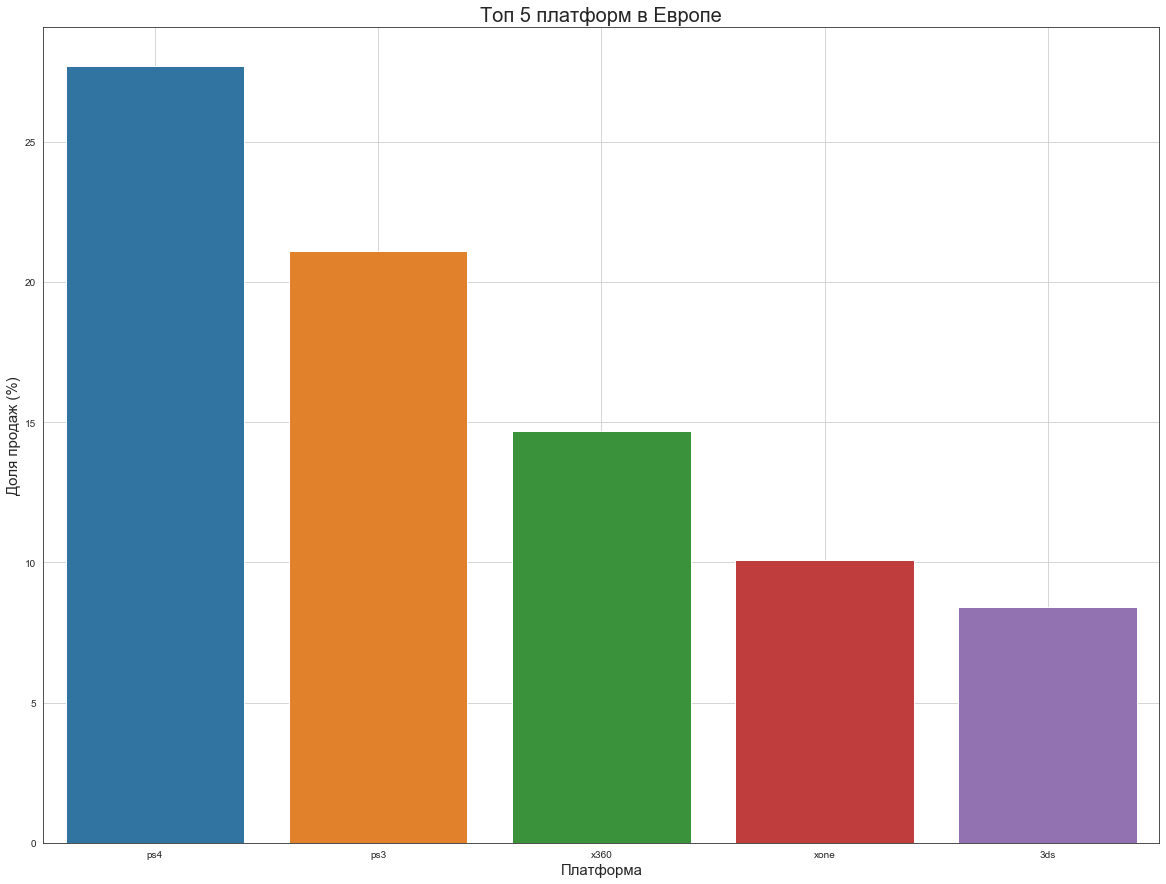

,platform,eu_sales
0,ps4,27.7
1,ps3,21.1
2,x360,14.7
3,xone,10.1
4,3ds,8.4


In [64]:
# топ 5 платформ в Европе
eu_top5_platform = data_pivot(games_final, 'platform', 'eu_sales', 'sum').head()
eu_top5_platform['eu_sales'] = ((eu_top5_platform['eu_sales']/games_final['eu_sales'].sum())*100).round(1)

# график топ 5 платформ в Европе 
barplt("platform","eu_sales",eu_top5_platform, 'Платформа', 'Доля продаж (%)', 'Топ 5 платформ в Европе')

### Северная Америка

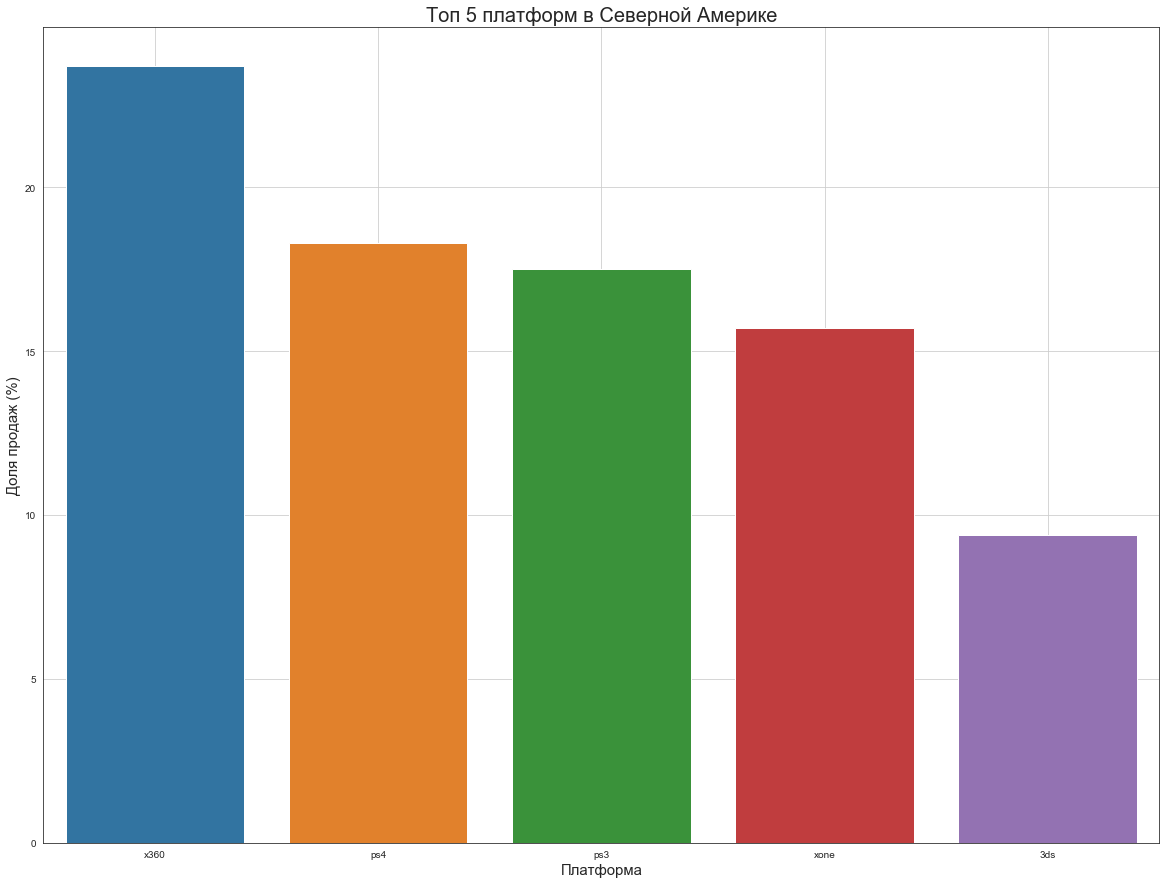

,platform,na_sales
0,x360,23.7
1,ps4,18.3
2,ps3,17.5
3,xone,15.7
4,3ds,9.4


In [65]:
# топ 5 платформ в Северной Америке
na_top5_platform = data_pivot(games_final, 'platform', 'na_sales', 'sum').head()
na_top5_platform['na_sales'] = ((na_top5_platform['na_sales']/games_final['na_sales'].sum())*100).round(1)

# график топ 5 платформ в Северной Америке 
barplt("platform","na_sales",na_top5_platform, 'Платформа', 'Доля продаж (%)', 'Топ 5 платформ в Северной Америке')

### Япония

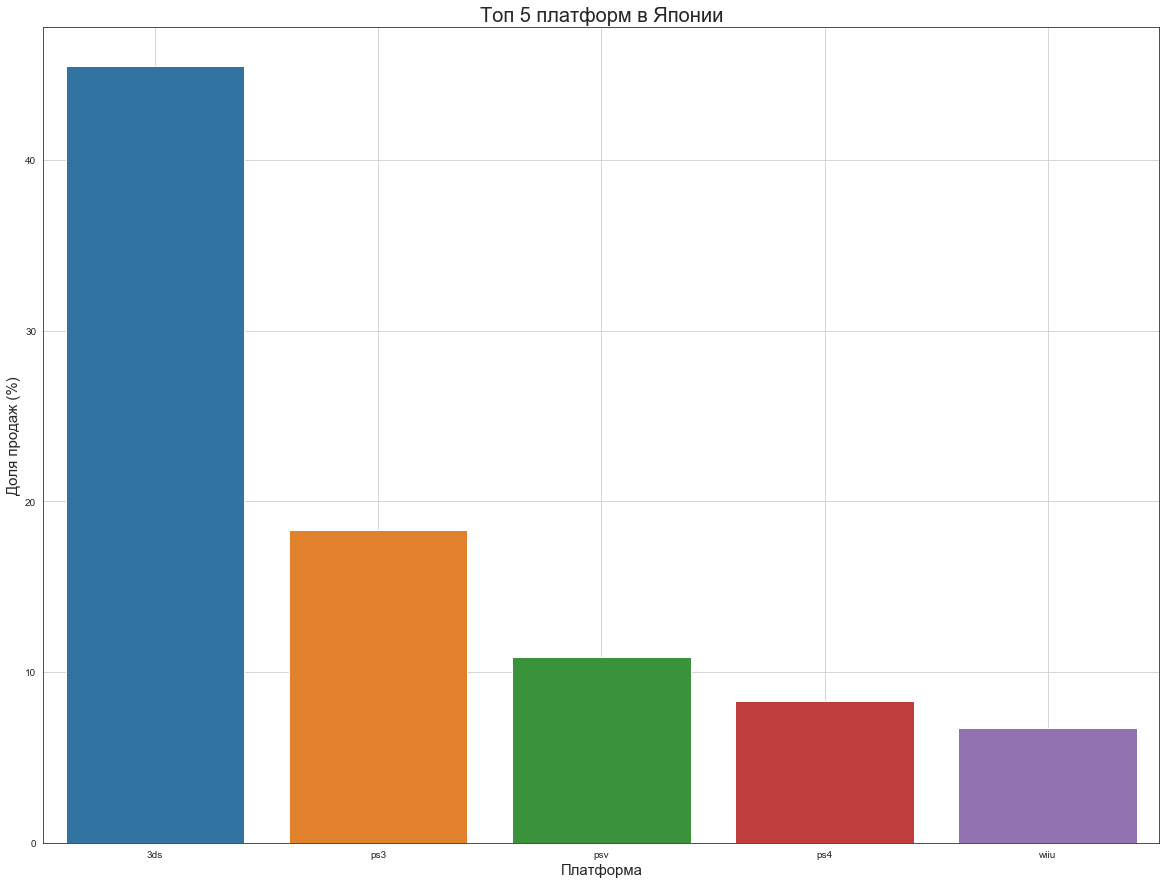

,platform,jp_sales
0,3ds,45.5
1,ps3,18.3
2,psv,10.9
3,ps4,8.3
4,wiiu,6.7


In [66]:
# топ 5 платформ в Японии
jp_top5_platform = data_pivot(games_final, 'platform', 'jp_sales', 'sum').head()
jp_top5_platform['jp_sales'] = ((jp_top5_platform['jp_sales']/games_final['jp_sales'].sum())*100).round(1)

# график топ 5 платформ в Японии 
barplt("platform","jp_sales",jp_top5_platform, 'Платформа', 'Доля продаж (%)', 'Топ 5 платформ в Японии')

На Европейском рынке лидирует консоль PS4, которая занимает треть рынка. На Северо-Американском рынке также лидирует XBOX 360 (23.7%), следом за ним идет с небольшим отставанием PS4 (18.3%). На рынке Японии - 3ds занимает 1 место и занимает половину рынка. Данные различия в популярности консолей связаны с культурными особенностями, в том числе и игровой культурой. Например в Японии предпочитают портативные консоли, а также японские консоли, на которые выпускают больше игр, заточенных по рынок азии. Консоли PS4 и Xbox 360 заточены под европейского и американского потребителя, которые предпочитают зрелищность игр и удобство в использовании консоли, взамен портативности.

### 2) Самые популярные жанры (топ-5).

### Европа

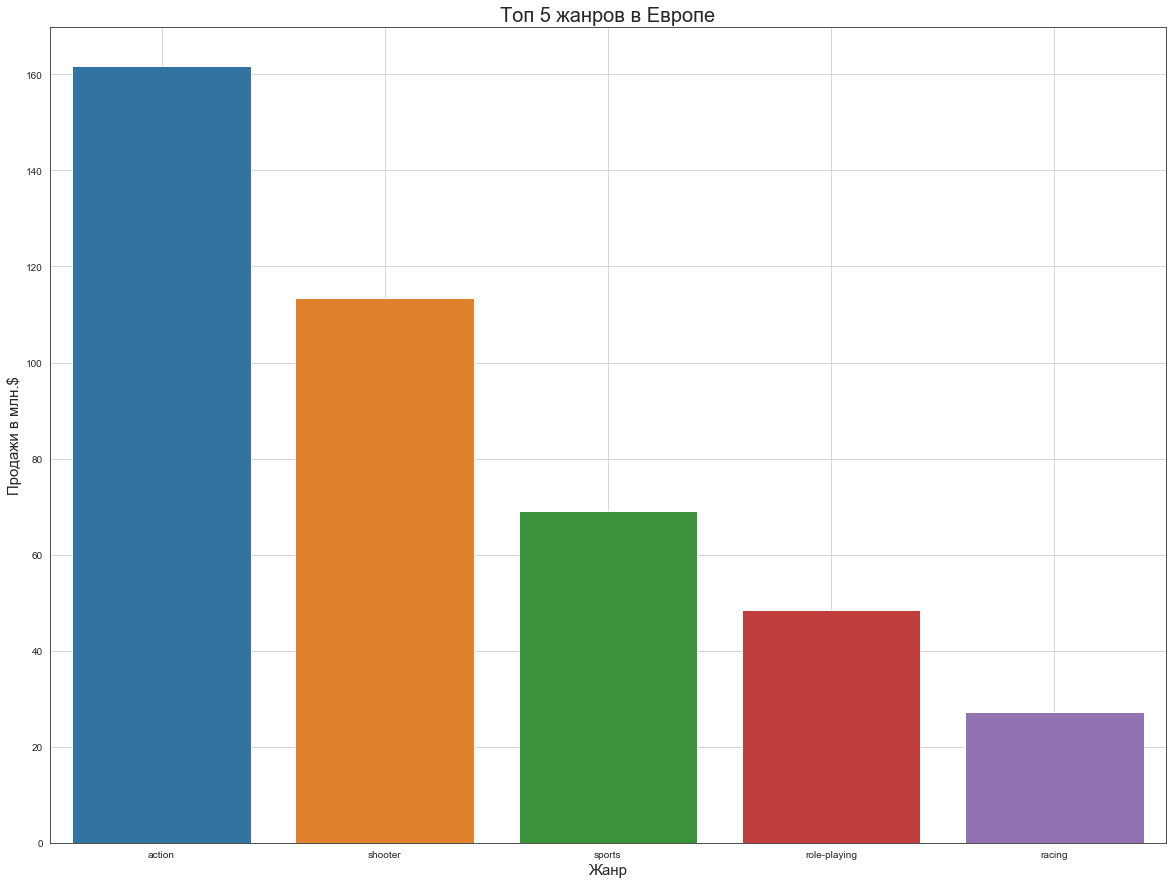

,genre,eu_sales
0,action,161.70
1,shooter,113.47
2,sports,69.09
3,role-playing,48.53
4,racing,27.29


In [67]:
# топ 5 жанров в Европе
eu_top5_genre = data_pivot(games_final, 'genre', 'eu_sales', 'sum').head()

# график топ 5 жанров в Европе 
barplt("genre","eu_sales", eu_top5_genre, 'Жанр', 'Продажи в млн.$', 'Топ 5 жанров в Европе')

### Северная Америка

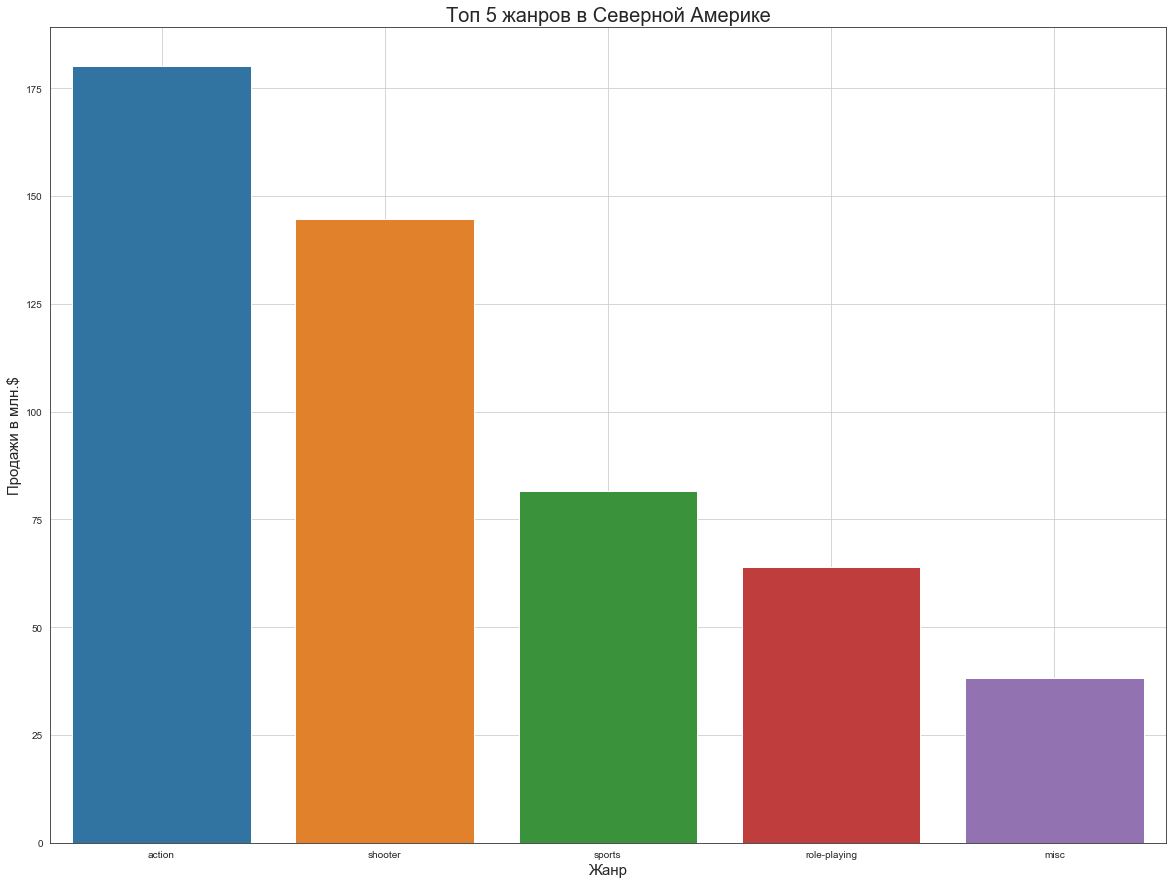

,genre,na_sales
0,action,180.15
1,shooter,144.79
2,sports,81.53
3,role-playing,64.00
4,misc,38.19


In [68]:
# топ 5 жанров в Северной Америке
na_top5_genre = data_pivot(games_final, 'genre', 'na_sales', 'sum').head()

# график топ 5 жанров в Северной Америке 
barplt("genre","na_sales", na_top5_genre, 'Жанр', 'Продажи в млн.$', 'Топ 5 жанров в Северной Америке')

### Япония

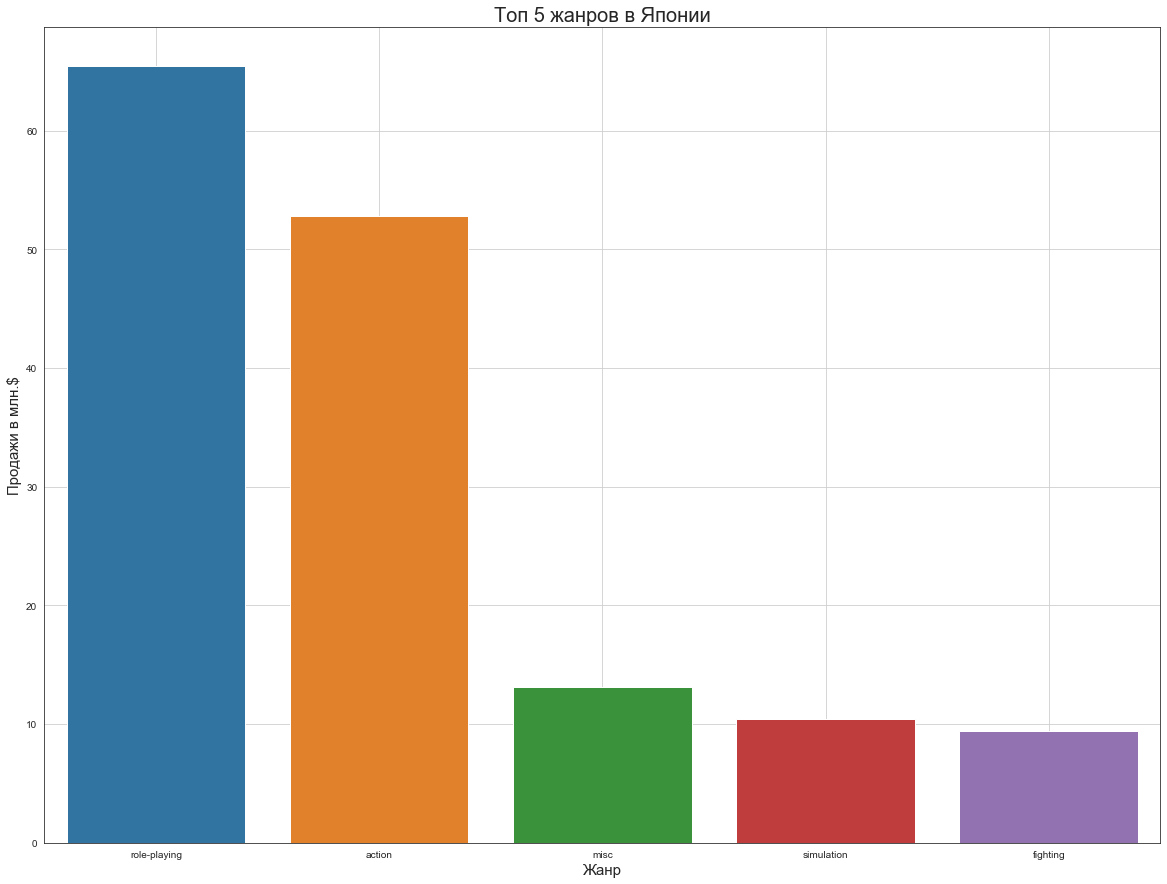

,genre,jp_sales
0,role-playing,65.44
1,action,52.80
2,misc,13.10
3,simulation,10.41
4,fighting,9.44


In [69]:
# топ 5 жанров в Японии
jp_top5_genre = data_pivot(games_final, 'genre', 'jp_sales', 'sum').head()

# график топ 5 жанров в Японии 
barplt("genre","jp_sales", jp_top5_genre, 'Жанр', 'Продажи в млн.$', 'Топ 5 жанров в Японии')

Среди самых популярных жанров у регионов также есть различия. Американцы и европейцы имеют схожие предпочтения по жанрам: экшн, шутер. Тогда как японцы больше всего предпочитают жанры: рпг и экшн.

### 3) Проанализиуем как влияет рейтинг ESRB на продажи в отдельном регионе.

### Европа

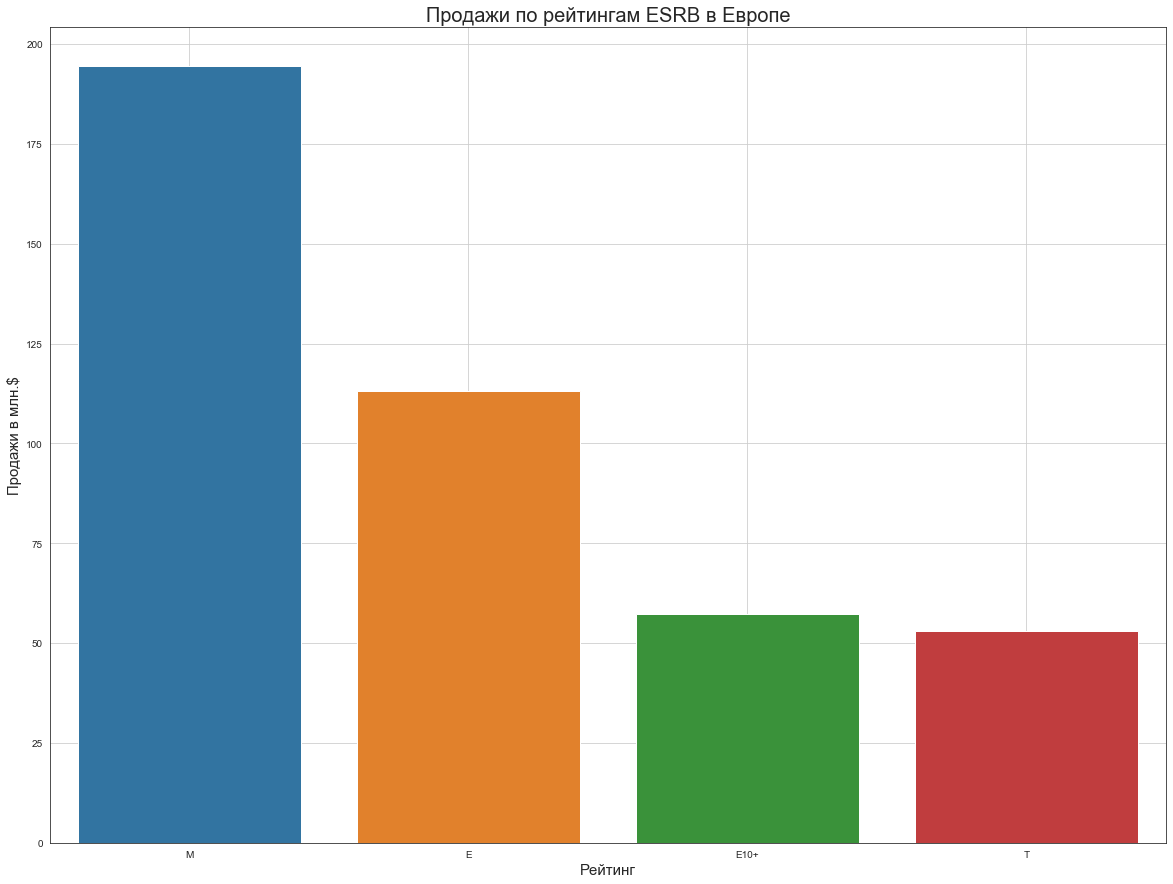

,rating,eu_sales
0,M,194.44
1,E,113.03
2,E10+,57.25
3,T,52.96


In [70]:
# продажи по рейтингам ESRB в Европе
eu_esrb = data_pivot(games_final, 'rating', 'eu_sales', 'sum')

# график продажи по рейтингам ESRB в Европе 
barplt("rating","eu_sales", eu_esrb, 'Рейтинг', 'Продажи в млн.$', 'Продажи по рейтингам ESRB в Европе')

### Северная Америка

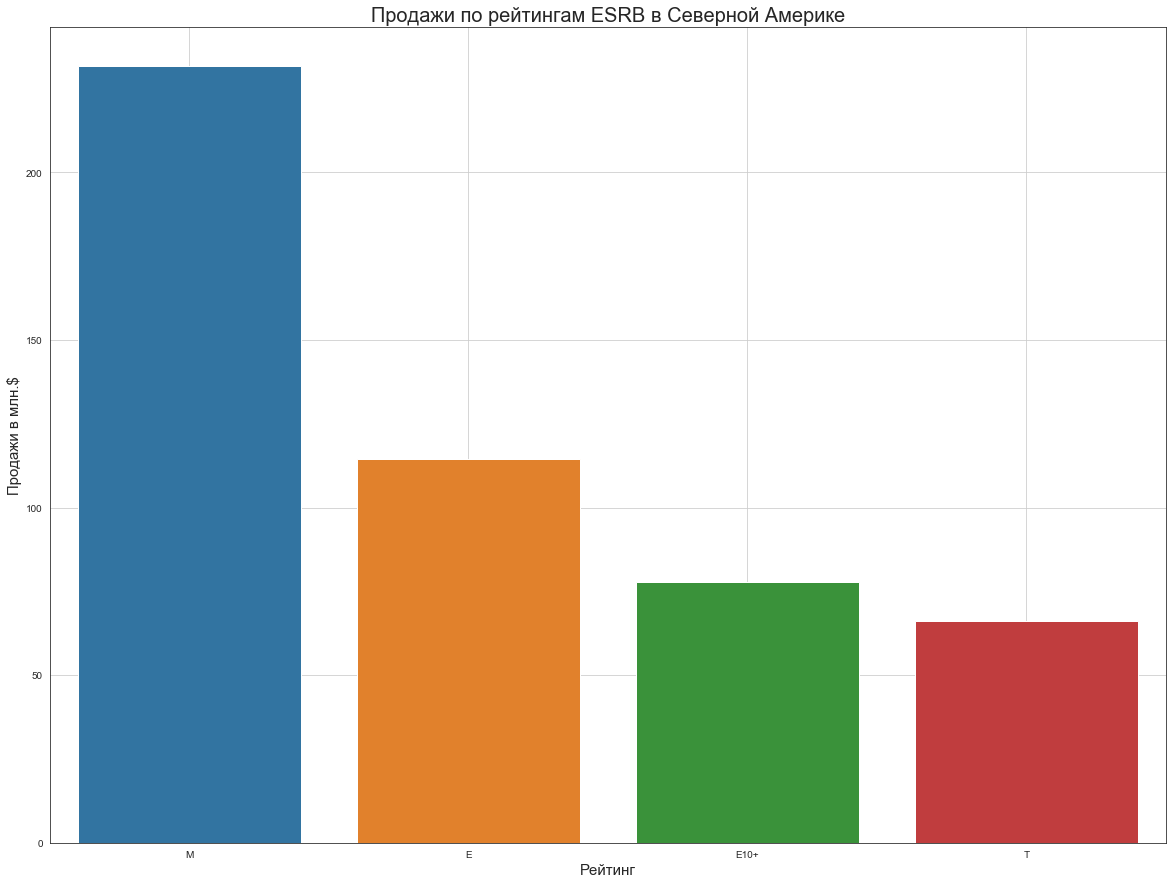

,rating,na_sales
0,M,231.67
1,E,114.37
2,E10+,77.93
3,T,66.02


In [71]:
# продажи по рейтингам ESRB в Северной Америке
na_esrb = data_pivot(games_final, 'rating', 'na_sales', 'sum')

# график продажи по рейтингам ESRB в Северной Америке 
barplt("rating","na_sales", na_esrb, 'Рейтинг', 'Продажи в млн.$', 'Продажи по рейтингам ESRB в Северной Америке')

### Япония

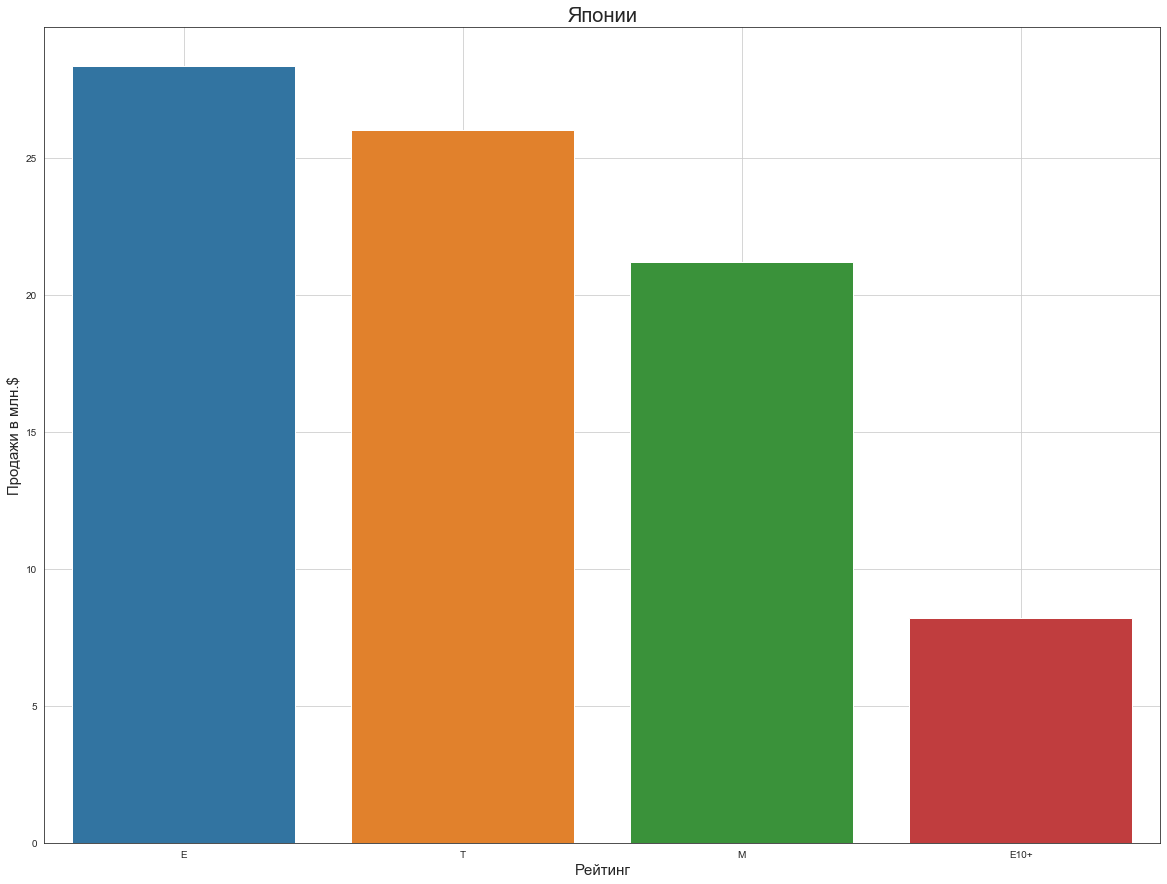

,rating,jp_sales
0,E,28.33
1,T,26.02
2,M,21.20
3,E10+,8.19


In [72]:
# продажи по рейтингам ESRB в Японии
jp_esrb = data_pivot(games_final, 'rating', 'jp_sales', 'sum')

# график продажи по рейтингам ESRB в Японии 
barplt("rating","jp_sales", jp_esrb, 'Рейтинг', 'Продажи в млн.$', 'Японии')

У американцев и европейцев лидируют по продажам игры с рейтингом М (17+), тогда как у японцев лидируют игры с рейтингом E (для всех).

## Вывод

Проанализировав полученные данные , мы можем составить портрет самого типичного пользователя для каждого региона. 
- для Европы это пользователь, который любит экшен игры для взрослых, владелец PS4.
- для Северной Америки это пользователь, который также любит экшен игры для взрослых, владелец XBOX 360.
- для Японии это пользователь, который любит рпг для всех возрастов и который предпочитает играть на 3ds.

# Шаг 5. Проверим гипотезы <a id = "5"> </a>

1) Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Сформируем нулевую гипотезу H₀. H₀ всегда формулируется так, чтобы использовать знак равенства. Звучать она будет так: "средние пользовательские рейтинги платформ Xbox One и PC не различаются." Следовательно альтернативная гипотеза H₁ будет звучать как: "средние пользовательские рейтинги платформ Xbox One и PC различаются". 

Определим 2 выборки для проверки гипотез.

In [73]:
# средний пользовательский рейтинг платформы Xbox One
xboxone_rating = games_final.query('platform == "xone"')['user_score'].dropna()

# средний пользовательский рейтинг платформы PC
pc_rating = games_final.query('platform == "pc"')['user_score'].dropna()

Уровень значимости - это вероятность того, что мы сочли различия существенными, а они на самом деле случайны. Установим критический уровень статистической значимости на общепринятом уровне для двух тестов = .05. Для решения вопроса о принятии или отвержении нулевой гипотезы будем использовать p-value. Проверим гипотезы.

In [74]:
# критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
alpha_1 = .05 

# указваем параметр equal_var функции st.ttest_ind равным "True", 
# так как обе выборки взяты из одной генеральной совокупности
results_1 = st.ttest_ind(
    xboxone_rating, 
    pc_rating, equal_var = True)

print('p-значение:', results_1.pvalue)

if (results_1.pvalue < alpha_1):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.8416471086251139
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средние пользовательские рейтингм двух платформ неодинаковы, с вероятностью почти 84% такое различие можно получить случайно. Это слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами двух платформ Xbox One и PC. Посмотрим средние значения 2-х популяций.

In [75]:
print('Средний пользовательский рейтинг платформы Xbox One:', round(xboxone_rating.mean(),2))
print('Средний пользовательский рейтинг платформы PC:', round(pc_rating.mean(),2))

Средний пользовательский рейтинг платформы Xbox One: 6.34
Средний пользовательский рейтинг платформы PC: 6.3


2) Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные. Сформируем нулевую гипотезу H₀. Звучать она будет так: "средние пользовательские рейтинги жанров Action и Sports не различаются" Следовательно альтернативная гипотеза H₁ будет звучать как: "средние пользовательские рейтинги жанров Action и Sports различаются".

Определим 2 выборки для проверки гипотез.

In [76]:
# средний пользовательский рейтинг жанра Action
action_rating = games_final.query('genre == "action"')['user_score'].dropna()

# средний пользовательский рейтинг жанра Sports
sports_rating = games_final.query('genre == "sports"')['user_score'].dropna()

Для решения вопроса о принятии или отвержении нулевой гипотезы будем использовать p-value.

In [77]:
# критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
alpha_2 = .05 

# указваем параметр equal_var функции st.ttest_ind равным "True", 
# так как обе выборки взяты из одной генеральной совокупности
results_2 = st.ttest_ind(
    action_rating, 
    sports_rating, equal_var = True)

print('p-значение:', results_2.pvalue)

if (results_2.pvalue < alpha_2):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.9889522999357605e-14
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что средний пользовательский рейтинг жанров Action и Sports неодинаков и с вероятностью близкой к нулю такое различие можно получить случайно. Из этого следует вывод о большом различие между средним пользовательским рейтингом жанров Action и Sports. Посмотрим средние значения 2-х популяций.

In [78]:
print('Средний пользовательский рейтинг жанра Action:', round(action_rating.mean(),2))
print('Средний пользовательский рейтинг жанра Sports:', round(sports_rating.mean(),2))

Средний пользовательский рейтинг жанра Action: 6.41
Средний пользовательский рейтинг жанра Sports: 5.19


## Вывод

В ходе анализа нам удалось подтвердить гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Также нам удалось подтвердить гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports различаются.

# Шаг 6. Общий вывод <a id = "6"> </a>

Была проведена обработка исходных данных от дубликатов, пропущенных и нулевых значений. Был выявлен недочет в полученных данных, а имеено то, что рейтинги по некоторым играм отсутствовали или были в статусе "tbd". Мы провели анализ обработанных данных. Выяснили, что продажи игр росли до 2008 года и с наступлением кризиса пошли на спад. Нам удалось выявить средний срок жизни платформы, который равен 10 годам. Наиболее перспективными платформами на конец 2016 года являются PS4 и Xbox One. На каждой платформе есть выбросы, которые представляют собой игру-хит, у которой продажи в разы больше, чем у остальных игр на платформе. Существует средняя положительная корреляция между рейтингами критиков и продажами. Рейтинги пользователей практически никак не коррелируют с продажами. Самыми прибыльными жанрами за последние 5 лет являются: экшн, шутер и РПГ. Проанализировав полученные данные , мы составили портрет самого типичного пользователя для каждого региона. Пользователи в Японии и Европе/ Северной Америке сильно различаются как по предпочтению платформы, так и по предпочитаемым жанрам. В ходе анализа нам удалось подтвердить гипотезы о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, и что средние пользовательские рейтинги жанров Action и Sports различаются.